# Regression Fundamentals: Introduction to Linear Regression

This is the third session in our regression foundations series. Previous
sessions discussed how to evaluate the differences between samples and
the relationships between pairs of variables. This session will focus on
bringing all of that together in order to make more precise inferences
and predictions using data.

We’ll continue using the Palmer Penguins dataset to build intuition for
regression concepts, then apply these methods to understand what drives
penguin body mass and how we can predict it from other physical
characteristics.

# Slides

Use the left ⬅️ and right ➡️ arrow keys to navigate through the slides
below. To view in a separate tab/window,
<a href="slides.html" target="_blank">follow this link</a>.

## What is Regression?

Regression is a method for modelling the relationship between one or
more explanatory variables (or predictors) and an outcome of interest.
The goal of regression is to find a function that predicts the outcome
from the predictors.

Regression is incredibly flexible in both approach and application. It
can fit to all kinds of data problem and can be used for descriptive,
explanatory, and predictive analysis. For this reason, it is a
foundational tool in statistics and data science.

## Why Build Models?

In our previous sessions, we compared groups (4/20 vs other days) and
examined relationships (penguin flipper length vs body mass). But both
approaches had limitations: group comparisons can’t handle continuous
predictors, and correlation only measures linear association between two
variables at a time.

Regression bridges these gaps. It lets us:

-   Quantify how much $Y$ changes when $X$ increases by one unit.
-   Include multiple predictors simultaneously.
-   Make predictions for new observations.
-   Test specific hypotheses about relationships.
-   Account for confounding variables.

Instead of just knowing flipper length and body mass are correlated, we
can say that each additional millimeter increase in flipper length
predicts an $X$ increase in body mass. And we can go much further than
this, controlling for environment, treating species as a grouping
structure in the data, or facotoring in non-linearity. With regression,
the possibilities are practically endless.

### From Association to Inference & Prediction

Correlation tells us variables move together. Regression tells us by how
much and in what direction, and gives us the tools to make inferences
and predictions.

Consider these questions that regression can answer but correlation
cannot:

-   If a penguin’s flipper is 200mm, what body mass do we predict?
-   How does the flipper-mass relationship differ between species?
-   What’s our uncertainty around these predictions?
-   Which variables matter most for predicting body mass?

## The Linear Regression Model

The most common type of regression model, and the foundation from which
so many other types of regression model are built, is linear regression.
Linear regression assumes the relationship between the predictors and
the outcome are linear, meaning that when predictors change in value the
outcome changes by a constant amount. Visually, this just means fitting
a straight line through data. For example, if you are paid £10 an hour,
your pay increases by exactly £10 for each additional hour worked. This
is a linear relationship.

If you have a predictor $X$ and an outcome $Y$, linear regression finds
the path through the data that best fits these points, otherwise known
as the “line of best fit”. This works by finding a line that passes
through the data with the minimum amount of prediction error, which is
the observed value minus the predicted value for each data pint (and is
oftn referred to as the residual). The most common way for calculating
the line of best fit is called Ordinary Least Squares (OLS)\[^OLS\].

Calculating the Line of Best fit Using OLS (Click to Expand)

### Ordinary Least Squares Estimation

We won’t spend too much time on OLS in this session, but the method it
uses for calculating the line of best fit is as follows:

1.  Calculate the residual for each observation (the actual value minus
    the predicted value).
2.  Square the residuals (so that positive and negative errors do not
    cancel each other out).
3.  Sum the squared residuals, sometimes called the Residual Sum of
    Squares (RSS).
4.  Find the line that produces the smallest RSS.

The formula for a simple linear regression model, predicting $Y$ with
one predictor $X$:

$$
Y = 
\underbrace{\vphantom{\beta_0} \overset{\color{#41B6E6}{\text{Intercept}}}{\color{#41B6E6}{\beta_0}} + 
\overset{\color{#005EB8}{\text{Slope}}}{\color{#005EB8}{\beta_1}}X \space \space}_{\text{Explained Variance}} + 
\overset{\mathstrut \color{#ED8B00}{\text{Error}}}{\underset{\text{Unexplained}}{\color{#ED8B00}{\epsilon}}}
$$

This breaks the problem down into three components, and estimates two
parameters:

-   $\beta_1$ - The slope, estimating the effect that $X$ has on the
    outcome, $Y$.
-   $\beta_0$ - The intercept, estimating the average value of $Y$ when
    $X = 0$.
-   $\epsilon$ - The error term, capturing the remaining variance in the
    outcome $Y$ that is not explained by the rest of the model.

> **Note**
>
> Don’t worry if this is intimidating at first. The main thing you need
> to remember is that this equation is just fitting a straight line
> through the data.

The regression line represents our best guess of the true relationship,
and the scatter around the line represents uncertainty.

## Building Our First Model

### Import & Prepare Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# load penguins data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-15/penguins.csv'
penguins_raw = pd.read_csv(url)

# clean data
df = penguins_raw.dropna()
df.head()

### Visualising the Relationship

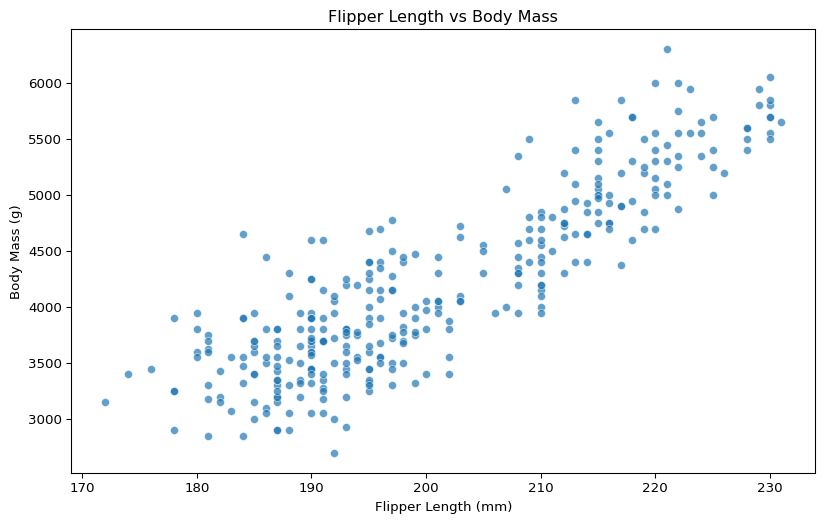

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_len', y='body_mass', alpha=0.7)
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

The relationship looks strongly linear and positive. This is a good
candidate for linear regression.

### Fitting the Model

In [3]:
# fit simple linear regression
X = df[['flipper_len']]  # predictor
y = df['body_mass']      # outcome

model = LinearRegression()
model.fit(X, y)

# extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

The intercept ($\beta_0$) = -5872.1g. The intercept tells us the
predicted body mass when flipper length is 0mm. This intercept value is
not meaningful because a flipper length of zero is implausible and
ultimately nonsensical (if they have flippers, they must be longer than
0mm)[1], but we need the intercept to fit the model.

The slope ($\beta_1$) = 50.2g/mm. The slope tells us that each
additional mm increase in flipper length predicts ~50g increase in body
mass.

### Visualising the Fitted Line

We can add the fitted line to our scatterplot and use this to make
predictions by tracing the flipper length from which we want to predict
body mass and then finding the body mass at that value.

[1] For explanatory models, it is generally best-practice to transform
the data so that the intercept is meaningful. For example, subtracting
the mean flipper length from each observation (otherwise known as
centering) so that the zero value represents the average flipper length
and the intercept represents the average body mass for the average
flipper length.

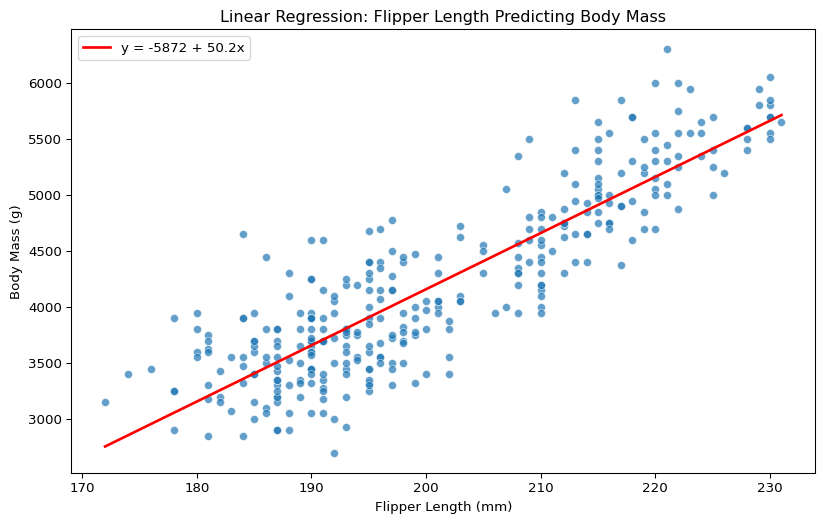

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_len', y='body_mass', alpha=0.7)

# add regression line
x_range = np.linspace(df['flipper_len'].min(), df['flipper_len'].max(), 100)
y_pred = intercept + slope * x_range
plt.plot(x_range, y_pred, color='red', linewidth=2, label=f'y = {intercept:.0f} + {slope:.1f}x')

plt.title('Linear Regression: Flipper Length Predicting Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

### Making Predictions

Using a fitted line to make predictions is imprecise. Instead, we can
use the linear regression formula detailed earlier to predict penguin
body mass from flipper length. We just have to plug in the intercept and
slope into the formula, along with the flipper length we want to predict
from, and this will give us the predicted body mass.

The applied formula looks like this:

$$
\text{Body Mass} = -5872.1 + 50.2 \times \text{Flipper Length}
$$

Or we can generate predictions using code:

In [5]:
# predict body mass for different flipper lengths
new_flipper_lengths = np.array([[190], [200], [210], [220]])
predictions = model.predict(new_flipper_lengths)

prediction_df = pd.DataFrame({
    'Flipper Length (mm)': new_flipper_lengths.flatten(),
    'Predicted Body Mass (g)': predictions.round(0)
})

print("Predictions for new observations:")
print(prediction_df)

Predictions for new observations:
   Flipper Length (mm)  Predicted Body Mass (g)
0                  190                   3657.0
1                  200                   4159.0
2                  210                   4660.0
3                  220                   5162.0

## Statistical Inference

So far we’ve focused on prediction. But regression also lets us make
inferences about the relationship between variables.

In [6]:
# use statsmodels for explanatory models
X_sm = sm.add_constant(df['flipper_len'])  # add intercept column
model_sm = sm.OLS(df['body_mass'], X_sm).fit()

print(model_sm.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_len    50.1533      1.540     32.562      0.000      47.123      53.183

When we are interested in explaining rather than predicting, the
coefficient (`coef`) is what matters most. This is the intercept and
slope values we calculated earlier. The coefficients tell us the size of
the effect observed in the data. If you want to explain the relationship
between variables, the effect size is the most important part of the
model.

The other outputs are useful for understanding how well your model fits
to the data and how certain the model is about the estimates. The
standard error (`std error`) tells us how much the actual values vary
around the fitted line, quantifying uncertainty. The 95% confidence
intervals (`[0.025` & `0.975]`) are another way of expressing this idea.
They effectively show a range of plausible coefficient values.

Finally, the t-statistic (`t`) is a test statistic[1] and the p-value
(`P>|t|`) is the probability of observing an effect as large (or larger)
as observed in the data if there was actually no relationship between
flipper length and body mass (and if the assumptions of the model are
valid). You can think of the p-value as an expression of how surprising
it would be to see a coefficient as large as the one we found if there
wasn’t actually a relationship between flipper length and body mass.

## Summary

Linear regression transforms correlation into a predictive and
explanatory tool. We can quantify relationships and make predictions.
Our penguin model shows that flipper length strongly predicts body mass,
with each additional mm corresponding to ~50g increase in weight.

The key insights from regression go beyond simple correlation: we can
make specific predictions, quantify uncertainty, and begin to understand
the mechanisms behind relationships. However, real-world relationships
are often more complex than simple linear models can capture.

In the next session, we will go into greater detail about the
implementation of linear regression, looking at how we fit models, their
assumptions, and how we interpret, present, and communicate our outputs.

[1] We will not discuss test statistics in detail here, but they are
standardised measures of how unusual your results are. It is used to
calculate the p-value. The t-statistic is the coefficient divided by its
standard error.